+# A2

In [1]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Nhập dữ liệu

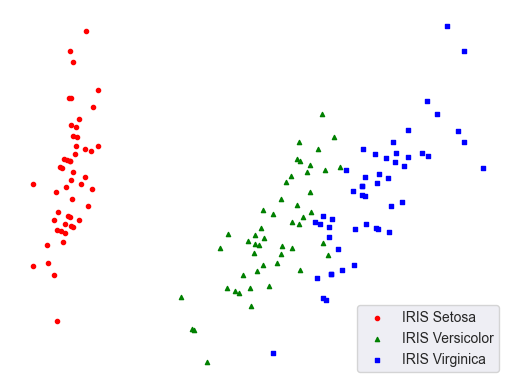

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :4]
Y = iris.target
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

## Các hàm xử lý

In [3]:
k = 20
def distance(array, value):
    array = np.array(array)
    return np.linalg.norm(array - value,ord=2, axis=1)

def find_nearest_index(array, value, k):
    array_D = distance(array, value)
    return np.argsort(array_D)[:k]
from sklearn.model_selection import train_test_split



In [4]:
def highest_rank(arr):
    count_num = {}
    for i in arr:
        count_num[i] = arr.count(i)
    return max(count_num, key=count_num.get)

In [5]:
def display(X, label):
    X0 = X[:, label == 0]
    X1 = X[:, label == 1]
    X2 = X[:, label == 2]
    plt.plot(X0[0, :], X0[1,:], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[0, :], X1[1,:], 'go', markersize = 4, alpha = .8)
    plt.plot(X2[0, :], X2[1,:], 'rs', markersize = 4, alpha = .8)
    plt.axis('off')
    plt.plot()
    plt.show()

## Chia train/test

In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_norm, Y, test_size=0.2, random_state=42, stratify=Y
)

## Dự đoán y_pred

[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 1 0 2 1 2 2 2 1 0 2 0]
[0 2 1 1 0 1 0 0 2 1 2 2 2 1 0 0 0 1 1 2 0 2 1 2 2 1 1 0 2 0]


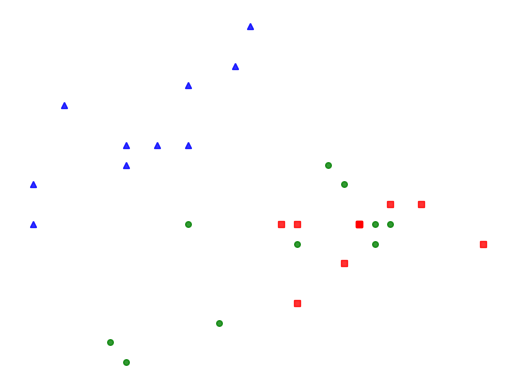

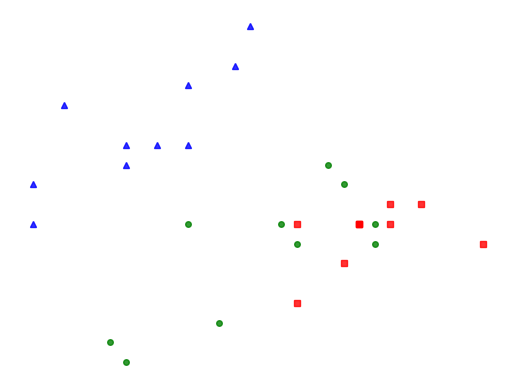

In [14]:
k = 20
y_pred = np.zeros(len(X_test)).astype(int)
for j in range(len(X_test)):
    indexes = find_nearest_index(X_train, X_test[j], k)
    y_nearest = []
    for i in range(k):
        y_nearest.append(Y_train[indexes[i]])
    y_pred[j] = highest_rank(y_nearest)
print(y_pred)
print(Y_test)
display(X_test.T, Y_test)
display(X_test.T, y_pred)

## Đánh giá Accuracy, Precision, Recall, F1-score, và Confusion Matrix

Accuracy : 0.9333
Precision: 0.9333
Recall   : 0.9333
F1-score : 0.9333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]


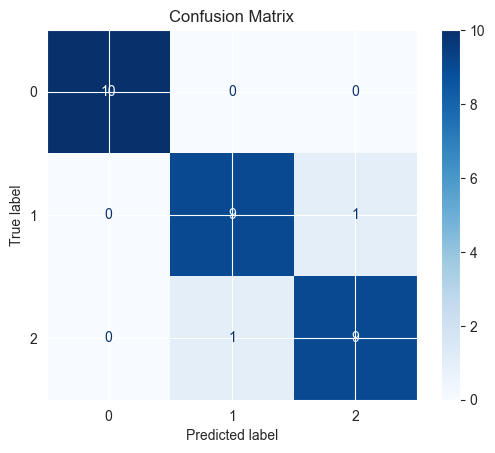

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
acc = accuracy_score(Y_test, y_pred)
prec = precision_score(Y_test, y_pred, average='macro')   # hoặc 'weighted' nếu dữ liệu mất cân bằng
rec = recall_score(Y_test, y_pred, average='macro')
f1 = f1_score(Y_test, y_pred, average='macro')

print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1-score : {f1:.4f}")

# --- Ma trận nhầm lẫn (Confusion Matrix) ---
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)

# --- Hiển thị trực quan ---
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Bài tập tự thực hành 1

In [ ]:
import pandas as pd
from sklearn.decomposition import PCA as sklearnPCA
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

## Nhập dữ liệu

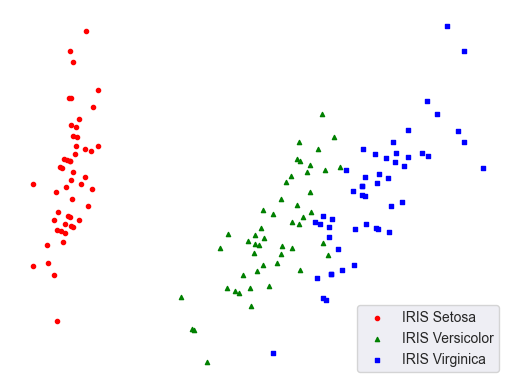

In [ ]:
iris = datasets.load_iris()
X = iris.data[:, :4]
Y = iris.target
X_norm = (X - X.min())/(X.max() - X.min())
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(X_norm))
plt.axis("off")
plt.scatter(transformed[Y==0][0], transformed[Y==0][1], s=9, label='IRIS Setosa',
c='red')
plt.scatter(transformed[Y==1][0], transformed[Y==1][1], s=9, label='IRIS Versicolor',
c='green', marker="^")
plt.scatter(transformed[Y==2][0], transformed[Y==2][1], s=9, label='IRIS Virginica',
c='blue', marker="s")
plt.legend()
plt.show()

## Chia train/test

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X_norm, Y, test_size=0.3, random_state=42, stratify=Y
)

## Các hàm tính toán

In [ ]:
from scipy import sparse
def convert_labels(y, C):
    if C is None:
        C = np.max(y)+1
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
# Y = convert_labels(Y, C)

In [ ]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis = 0, keepdims = True))
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_regression(X, y, W_init, eta, tol = 1e-4, max_count = 100000):
    W = [W_init]
    C = W_init.shape[1]
    Y = convert_labels(y, C)
    it = 0
    N = X.shape[1]
    d = X.shape[0]

    count = 0
    check_w_after = 20
    while count < max_count:
        # mix data
        mix_id = np.random.permutation(N)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax(np.dot(W[-1].T, xi))
            W_new = W[-1] + eta*xi.dot((yi - ai).T)
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(W_new - W[-check_w_after]) < tol:
                    return W

            W.append(W_new)
    return W


In [ ]:
def cost(X, Y, W):
    A = softmax(W.T.dot(X))
    return -np.sum(Y*np.log(A))

def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

## Tìm ra w, in ra y_pred và các đánh giá liên quan

In [ ]:
eta = .05
d = X_train.T.shape[0]
W_init = np.random.randn(d, 3)
W = softmax_regression(X_train.T, Y_train, W_init, eta)
print(W[-1])

[[  6.98534941   7.50596697 -12.88538577]
 [ 15.54824773  -3.17438929 -11.71053316]
 [-20.25151233  -0.60126611  22.38712815]
 [ -9.32157153  -9.15269255  16.070541  ]]


2 || 2
1 || 1
2 || 2
1 || 1
2 || 2
2 || 2
1 || 1
1 || 1
0 || 0
2 || 2
0 || 0
0 || 0
2 || 2
2 || 2
0 || 0
2 || 2
1 || 1
0 || 0
0 || 0
0 || 0
1 || 1
0 || 0
1 || 1
2 || 2
2 || 2
1 || 1
2 || 1
1 || 1
1 || 1
0 || 0
2 || 2
2 || 2
1 || 1
0 || 0
2 || 2
0 || 0
0 || 0
0 || 0
0 || 0
1 || 1
1 || 1
0 || 0
2 || 2
2 || 2
1 || 1
Accuracy: 0.9777777777777777
Confusion Matrix:
 [[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


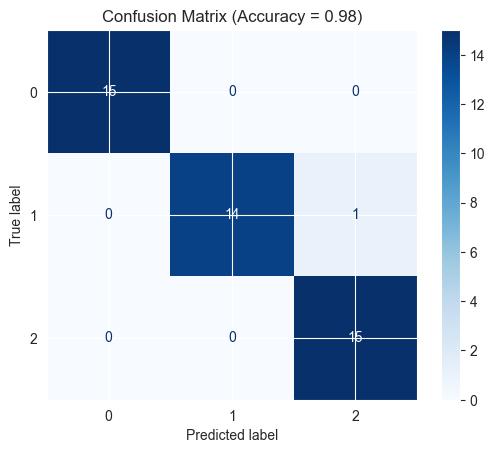

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred = pred(W[-1], X_test.T)
for i in range(len(y_pred)):
    print(f"{y_pred[i]} || {Y_test[i]}")
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
cm = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:\n", cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d')
plt.title(f'Confusion Matrix (Accuracy = {accuracy:.2f})')
plt.show()


# Bài tập tự thực hành 2

In [17]:
import numpy as np
from scipy import sparse
from sklearn.datasets import fetch_20newsgroups_vectorized
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

## Nhập dữ liệu

In [18]:
n_samples = 20000
X, y = fetch_20newsgroups_vectorized(subset='all', return_X_y=True)
X = X[:n_samples]
y = y[:n_samples]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42, stratify=y, test_size=0.25
)

train_samples, n_features = X_train.shape
n_classes = np.unique(y).shape[0]

## Các hàm phụ trợ


In [19]:
def convert_labels(y, C):
    Y = sparse.coo_matrix(
        (np.ones_like(y), (y, np.arange(len(y)))),
        shape=(C, len(y))
    ).toarray()
    return Y

In [20]:
def softmax_stable(Z):
    e_Z = np.exp(Z - np.max(Z, axis=0, keepdims=True))
    return e_Z / e_Z.sum(axis=0, keepdims=True)
def softmax_regression(X, y, W_init, eta=0.05, tol=1e-4, max_iter=8):
  W = W_init.copy()
  C = W.shape[1]
  Y = convert_labels(y, C)
  N = X.shape[0]
  X_dense = X.toarray()
  X_T = X_dense.T

  for i in range(max_iter):
      Z = W.T.dot(X_T)
      A = softmax_stable(Z)
      grad = -X_dense.T.dot((Y - A).T) / N
      W_new = W - eta * grad

      delta = np.linalg.norm(W_new - W)

      if delta < tol:
          break
      W = W_new

  return W


In [21]:
def predict(W, X):
    X_dense = X.toarray()
    Z = W.T.dot(X_dense.T)
    A = softmax_stable(Z)
    return np.argmax(A, axis=0)


## Train mô hình


In [22]:
W_init = np.random.randn(n_features, n_classes) * 0.01

W_final = softmax_regression(
    X_train,
    y_train,
    W_init,
    eta=0.05,
    tol=1e-4,
    max_iter=5
)

## Đánh giá

In [24]:
print("\n Đánh giá mô hình trên tập test...\n")
y_pred = predict(W_final, X_test)

acc = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(" Độ chính xác (Accuracy): {:.2f}%".format(acc * 100))
print("\n Ma trận nhầm lẫn (Confusion Matrix):\n")
print(cm)


 Đánh giá mô hình trên tập test...

 Độ chính xác (Accuracy): 4.73%

 Ma trận nhầm lẫn (Confusion Matrix):

[[23  2 19  5 10  0 17  7 14  9  4  5  7 31  2  0  8  0  4 33]
 [41  4 20 12 15  2 18  4 13 19 11  4 11 20  0  2 19  1 10 17]
 [38  2 28 11 14  5 12 10 14 23  8  7  8 18  0  1 16  0  9 22]
 [33  3 36 14  5  0  4  5  8 29 25  7  5 24  0  0  8  2  5 32]
 [37  1 16  6  9  4 15 10 11 18 19 10  7 25  0  1 16  2 11 23]
 [42  1 22 18 16  1 10 12  8 17  8  1 13 27  0  1 10  3 12 25]
 [41  4 36 12  4  5 14  8 11 24 10 13  9  9  0  2 17  2  7 16]
 [25  2 27 12  7  0 15 10  9 18  9  8  7 35  1  0  6  1  9 47]
 [61  0 17 11 12  0  9 14 21 10  8  5  8 27  0  1 11  2  1 31]
 [23  0 16  6 11  3 40 15 18  9 10 20  7 28  1  0 10  2  4 26]
 [44  0 18  2  9  3 23 11 10 15 11 29 17 29  0  0  5  0  6 18]
 [49  2 27  9  7  3 32 10 12 11  7  8  5 28  0  0  6  3 10 19]
 [35  5 33 12  4  1 19  9 10 23  8 11  7 23  1  1 12  2  6 24]
 [40  2 22 22  7  0 27 15 10 10  5  6  5 32  0  0 13  0  6 25]
 [37  1 2

# Bài tập tự thực hành 4

In [1]:
import os
import numpy as np
# set names to the paths because they're too long
data_path = ''
# train path
train_images_path = os.path.join(data_path, 'train-images-idx3-ubyte.gz')
train_labels_path = os.path.join(data_path, 'train-labels-idx1-ubyte.gz')
# test path
test_images_path = os.path.join(data_path, 't10k-images-idx3-ubyte.gz')
test_labels_path = os.path.join(data_path, 't10k-labels-idx1-ubyte.gz')


In [2]:
def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28):
    """
    This shuffle param is active when .gz is downloaded at:
    - 'http://yann.lecun.com/exdb/mnist/'
    - This function return random num_images in 60000 or 10000
    """
    # read data
    import gzip # to decompress gz (zip) file
    # open file training to read training data
    f_images = gzip.open(images_path,'r')
    # skip 16 first bytes because these are not data, only header infor
    f_images.read(16)
    # general: read num_images data samples if this parameter is set;
    # if not, read all (60000 training or 10000 test)

    real_num = num_images if not shuffle else (60000 if _is else 10000)
    # read all data to buf_images (28x28xreal_num)
    buf_images = f_images.read(image_size * image_size * real_num)
    # images
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32)
    images = images.reshape(real_num, image_size, image_size,)
    # Read labels
    f_labels = gzip.open(labels_path,'r')
    f_labels.read(8)
    labels = np.zeros((real_num)).astype(np.int64)
    # rearrange to correspond the images and labels
    for i in range(0, real_num):
        buf_labels = f_labels.read(1)
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)
    # shuffle to get random images data
    if shuffle is True:
        rand_id = np.random.randint(real_num, size=num_images)
        images = images[rand_id, :]
        labels = labels[rand_id,]
    # change images data to type of vector 28x28 dimentional
    images = images.reshape(num_images, image_size * image_size)
    return images, labels

In [6]:
train_images, train_labels = get_mnist_data(train_images_path, train_labels_path, 5000, shuffle=True)
test_images, test_labels = get_mnist_data(test_images_path,test_labels_path, 10000, _is=False, shuffle=True)
print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)

C:\Users\DELL\AppData\Local\Temp\ipykernel_13860\3573562231.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


In [47]:
# Convert matrix to image
def get_image(image):
    return image.reshape(28, 28)
# These methods are from Vi du 1
def convert_labels(y, C):
    from scipy import sparse
    Y = sparse.coo_matrix((np.ones_like(y), (y, np.arange(len(y)))), shape = (C, len(y))).toarray()
    return Y
def softmax(Z):
    e_Z = np.exp(Z)
    A = e_Z / e_Z.sum(axis = 0)
    return A
def softmax_stable(Z):
    Z_max = np.max(Z, axis=0, keepdims=True)
    expZ = np.exp(Z - Z_max)  # tránh tràn số
    return expZ / np.sum(expZ, axis=0, keepdims=True)
def pred(W, X):
    A = softmax_stable(W.T.dot(X))
    return np.argmax(A, axis = 0)

In [74]:
def _softmax_regression(X, Y, theta, lambda_=0.5, iterations=20, learning_rate=1e-5, batch_size=200):
    from sklearn.metrics import log_loss
    losses = []
    _theta = theta.copy()
    d, N = X.shape
    C = Y.shape[0]  # số lớp

    for iter_ in range(iterations):
        shuffle_index = np.random.permutation(N)
        for i in shuffle_index:
            xi = X[:, i].reshape(d, 1)
            yi = Y[:, i].reshape(C, 1)
            ai = softmax_stable(np.dot(_theta.T, xi))

            # gradient + regularization
            grad = xi.dot((yi - ai).T) - lambda_ * _theta
            _theta += learning_rate * grad

            # batch check
            if (iter_ * N + i) % batch_size == 0:
                Y_hat = softmax_stable(np.dot(_theta.T, X))
                loss = log_loss(Y.T, Y_hat.T)
                losses.append(loss)

        # evaluate after each epoch
        Y_hat = softmax_stable(np.dot(_theta.T, X))
        cost = log_loss(Y.T, Y_hat.T) + (lambda_ / 2) * np.sum(_theta ** 2)
        print(f"Epoch {iter_ + 1}/{iterations} - Cost: {cost:.6f}")

    return _theta, losses


2 7


<Figure size 640x480 with 0 Axes>

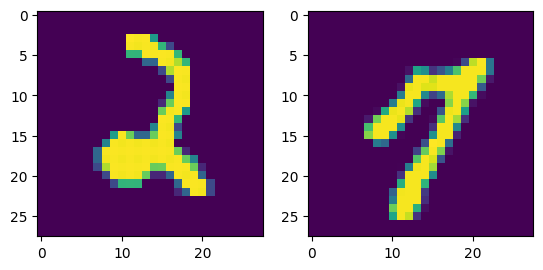

In [55]:
import random
import matplotlib.pyplot as plt
index = random.randint(0, 1000)
print(train_labels[index], test_labels[index])
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [70]:
X_train = np.concatenate((np.ones((1, train_images.shape[0])), train_images.T),
axis = 0)

Y_train = convert_labels(train_labels, 10)

(785, 5000)
(10, 5000)


<Figure size 640x480 with 0 Axes>

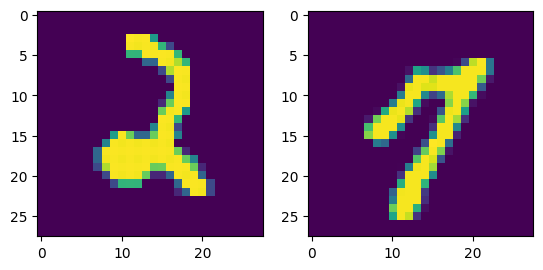

In [72]:
print(X_train.shape)
print(Y_train.shape)
train_image = np.asarray(get_image(train_images[index])).squeeze()
test_image = np.asarray(get_image(test_images[index])).squeeze()
plt.figure()
#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1, 2)
# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(train_image)
axarr[1].imshow(test_image)
plt.show()

In [75]:
theta = np.zeros((X_train.shape[0], 10))
opt_theta, losses = _softmax_regression(X_train, Y_train, theta)
print('training success: ', opt_theta.shape, len(losses))

Epoch 1/20 - Cost: 4.277801
Epoch 2/20 - Cost: 2.785962
Epoch 3/20 - Cost: 3.013571
Epoch 4/20 - Cost: 2.571281
Epoch 5/20 - Cost: 3.573277
Epoch 6/20 - Cost: 2.290912
Epoch 7/20 - Cost: 3.808798
Epoch 8/20 - Cost: 2.039703
Epoch 9/20 - Cost: 1.791932
Epoch 10/20 - Cost: 2.059701
Epoch 11/20 - Cost: 3.528574
Epoch 12/20 - Cost: 1.706421
Epoch 13/20 - Cost: 1.879071
Epoch 14/20 - Cost: 1.690269
Epoch 15/20 - Cost: 2.341609
Epoch 16/20 - Cost: 1.731904
Epoch 17/20 - Cost: 1.830201
Epoch 18/20 - Cost: 1.910019
Epoch 19/20 - Cost: 1.916570
Epoch 20/20 - Cost: 2.019969
training success:  (785, 10) 500


In [76]:
from sklearn.metrics import accuracy_score
print('accuracy training data: ', accuracy_score(train_labels,
pred(opt_theta, X_train)))

# test_images, test_labels = get_mnist_data(
# test_images_path, test_labels_path, 1000, _is=False, shuffle=False)
X_test = np.concatenate((np.ones((1, test_images.shape[0])), test_images.T),
axis = 0)

print(X_test.shape)
print('accuracy testing data: ', accuracy_score(test_labels,

pred(opt_theta, X_test)))

accuracy training data:  0.9354
(785, 10000)
accuracy testing data:  0.8717


## Giảm số chiều xuống 2D và hiển thị phân bố dữ liệu

Dữ liệu sau khi giảm chiều: (5000, 2) (10000, 2)


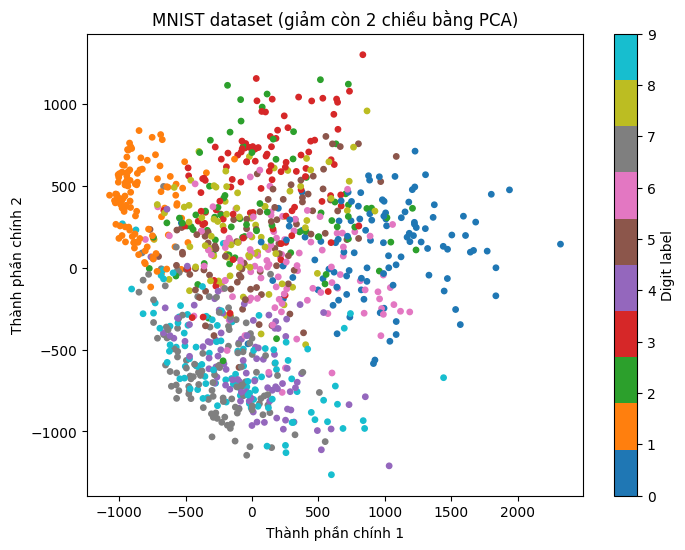

In [77]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Giảm số chiều xuống 2
pca = PCA(n_components=2)
X_train_2d = pca.fit_transform(train_images)
X_test_2d = pca.transform(test_images)

print("Dữ liệu sau khi giảm chiều:", X_train_2d.shape, X_test_2d.shape)

# Vẽ trực quan 1000 điểm đầu tiên
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_train_2d[:1000, 0], X_train_2d[:1000, 1],
                      c=train_labels[:1000], cmap='tab10', s=15)
plt.colorbar(scatter, label='Digit label')
plt.title('MNIST dataset (giảm còn 2 chiều bằng PCA)')
plt.xlabel('Thành phần chính 1')
plt.ylabel('Thành phần chính 2')
plt.show()

## Huấn luyện Logistic Regression của sklearn và so sánh

C:\Users\DELL\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


🎯 Độ chính xác trên tập huấn luyện: 100.0 %
🎯 Độ chính xác trên tập kiểm tra: 87.29 %


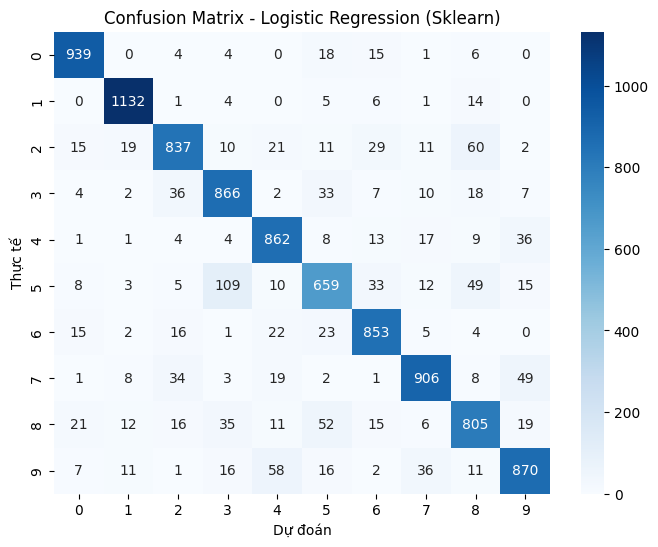

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(train_images, train_labels)
y_pred_train = clf.predict(train_images)
y_pred_test = clf.predict(test_images)
train_acc = accuracy_score(train_labels, y_pred_train)
test_acc = accuracy_score(test_labels, y_pred_test)

print("🎯 Độ chính xác trên tập huấn luyện:", round(train_acc * 100, 2), "%")
print("🎯 Độ chính xác trên tập kiểm tra:", round(test_acc * 100, 2), "%")
cm = confusion_matrix(test_labels, y_pred_test)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression (Sklearn)')
plt.xlabel('Dự đoán')
plt.ylabel('Thực tế')
plt.show()